
<img src=https://ers-transit.github.io/images/hex-transit.svg width=33% alt="ers-transit logo, with transit light curve embedded in hexagonal mirror">

# *Day 0* = How do we get started working with JWST data?



## Learning Goals

This tutorial is designed to help an enthusiastic astronomer start using the Python coding language to start interacting with JWST data. By completing this tutorial, we hope for you be able to:
- use Anaconda Python on your computer
- have access a self-contained JWST coding environment
- run code, write thoughts, and see outputs in a jupyter notebook
- import code from modules and packages
- open a simulated JWST dataset


## Installing Anaconda `python`.

### Why are we using Python?$^*$
- It's good.
- It's free and open-source.
- STScI uses it for JWST and all new code tools.

$^*$*Other languages and analysis tools are great too!*

### Why are we using Anaconda?

[Anaconda](https://www.anaconda.com/products/individual) is an open-source Python distribution. 

"*My computer has python already installed. Why should I install it again?*"

- `conda` can create and manage self-contained environments with all the dependencies you need$^*$. Python codes inevitably have oodles of dependencies, requiring specific versions of specific packages be installed.
- `conda` also makes all computers (Mac, Windows, Linux) behave more similarly to each other. That makes it much easier to collaborate with other folks.

$^*$*There are other snazzy tools for this too, like `pyenv` and `poetry`. Christina Hedges has a nice [introduction](https://christinahedges.github.io/astronomy_workflow/) to them.*

### How do we install Anaconda? 
- Download the [Anaconda Individual Edition](https://www.anaconda.com/products/individual). The file should be about 400-500MB. 
- Once the download is complete:
    - If you downloaded a Graphical Installer, open the installer file and follow the instructions.
    - If you downloaded a Command Line Installer, run `bash Anaconda3-2021.05-MacOSX-x86_64.sh` (or whatever the exact filename is) in a Terminal.


### Is it working?

Once installed, you can test your `conda` installation in one of two ways:
1. Open the Anaconda-Navigator application on your computer. If it opens, it works!
2. In a Terminal (Mac/Linux) or the Anaconda Prompt (Windows), run the command `conda info`. If it gives some info, it works!


## Creating an `ers-transit` conda environment.

### How do `conda` environments make life easier?

Each `conda` environment can be turned on and off. This can be really helpful when you have different codes that depend on different versions of packages or Python across your computer; because environments are self-contained, you can experiment in one place without disrupting everything everywhere else!


We defined an `ers-transit` "conda environment" with the correct version of Python and all the ingredients you need to get started. 

To set up this environment:
1. Use a Terminal (Mac/Windows) or Anaconda Prompt (Windows) to navigate to this tutorial's directory, which contains the file `environment.yml`. 
2. Run the command `conda env create -f environment.yml`. It should take a few minutes to finish.


### How do we enter or and leave `conda` environments?
Once your environment has been created:
- You can enter the environment by running `conda activate ers-transit`
- You can see all the environments on your computer by running `conda env list`
- You can leave the environment by running `conda deactivate`

(If you're working in the Anaconda-Navigator graphical user interface, you can manage your conda environments via the *Environments* tab, and create a new one from an `environment.yml` file via the *Import* button.)

## Using `jupyter notebook`.

A *jupyter notebook* is a document containing code, outputs, and explanatory text.

### How do we open a jupyter notebook? 
- Use a Terminal (Mac/Windows) or Anaconda Prompt (Windows) to navigate to this tutorial's directory. 
- Make sure your `ers-transit` conda environment is activated. 
- Run `jupyter notebook`. Once a jupyter file browser appears, click the `.ipynb` notebook file to open it.

### How do we run code? 
- Create *Code* cells, and press **`<shift>+<return>`** to run them.

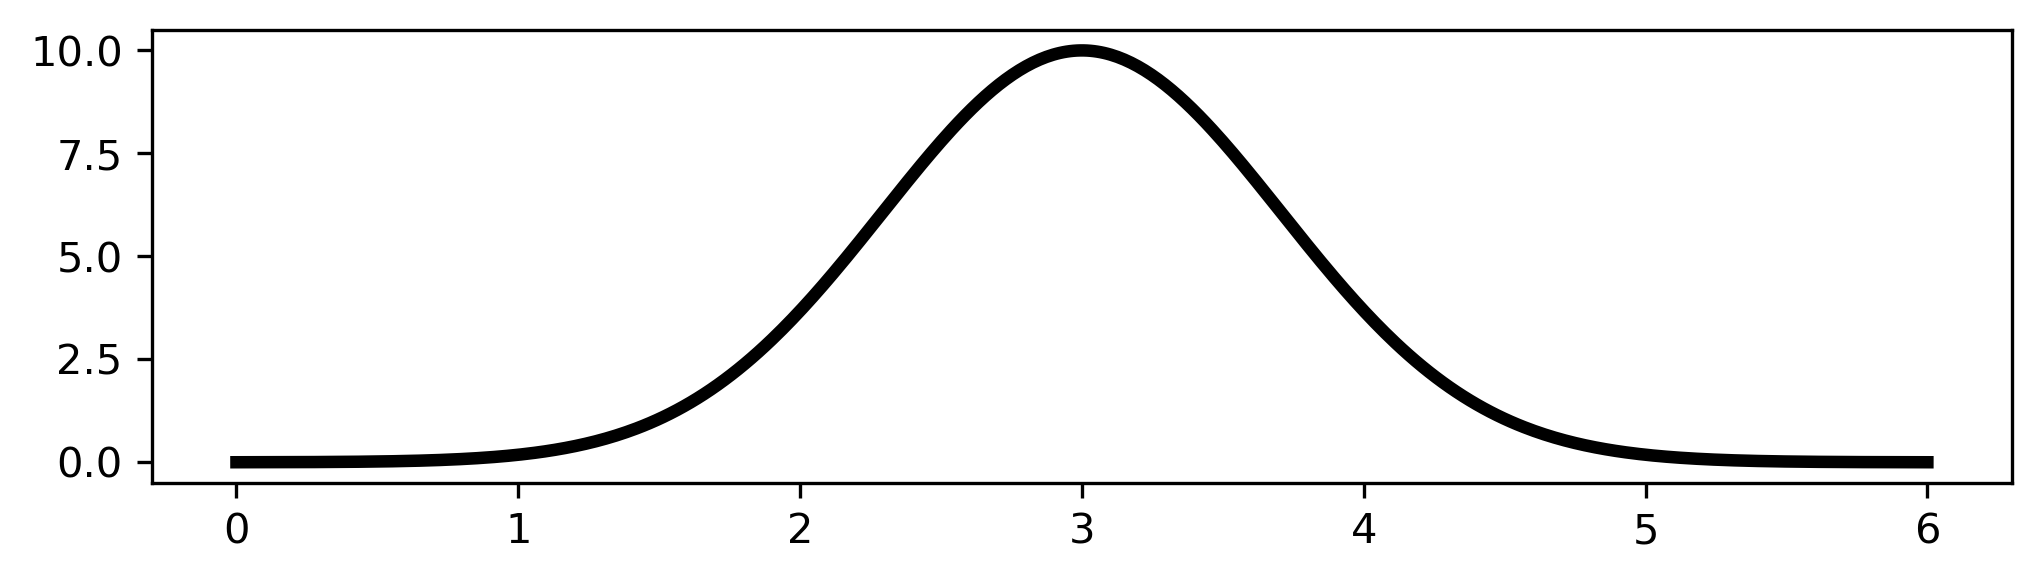

In [1]:
import matplotlib.pyplot as plt, numpy as np
plt.style.use('bigger-figures.mplstyle')

x = np.linspace(0, 6, 500)
y = 10*np.exp(-(x-3)**2)
plt.plot(x, y, color='black', linewidth=3); 

*Be aware:* It's possible to run code cells out of the order that they appear in the notebook. Avoid relying on this, so that you (or someone else) can run your notebook straight through from start to finish.

In [2]:
import astropy.units as u
from astropy.constants import G

M = 1.0*u.Mearth
R = 1.0*u.Rearth

In [3]:
g = (G*M/R**2).to('m/s**2')
print(f'The surface gravity of this planet is {g}')

The surface gravity of this planet is 9.798398133669465 m / s2


In [4]:
M = 1.99e30*u.kg

We'll get very different answers depending on the order we run the three above cells.

## Using `python` packages and modules.

Sometimes you want to use the same code in multiple places, or sometimes you just don't want to see *all* of the code inside your notebook. It can help to store your code in modules or packages. 

- A `module` is just a text file with a `.py` extension that contains some Python code.
- A `package` is a directory full of lots of modules. We've already use the `matplotlib`, `numpy`, and `astropy` packages.

We'll walk through a very quick example of how to write your own modules. 

Let's say we write some code to plot a transit light curve. (This just copies the Quickstart for [`batman-package`](https://lweb.cfa.harvard.edu/~lkreidberg/batman/).)

In [5]:
import batman
import numpy as np
import matplotlib.pyplot as plt

def plot_lightcurve(rp=0.1, a=15.0, inc=87.0, **kw):
    params = batman.TransitParams()
    params.t0 = 0.                       #time of inferior conjunction
    params.per = 1.                      #orbital period
    params.rp = rp                      #planet radius (in units of stellar radii)
    params.a = a                       #semi-major axis (in units of stellar radii)
    params.inc = inc                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 90.                       #longitude of periastron (in degrees)
    params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
    params.limb_dark = "quadratic"       #limb darkening model

    t = np.linspace(-0.05, 0.05, 1000)

    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve

    # plot the light curves
    plt.plot(t, flux, **kw)
    plt.xlabel("Time from central transit")
    plt.ylabel("Relative flux")

That code cell defined a function that we can use to plot light curves, if we feed them different inputs.

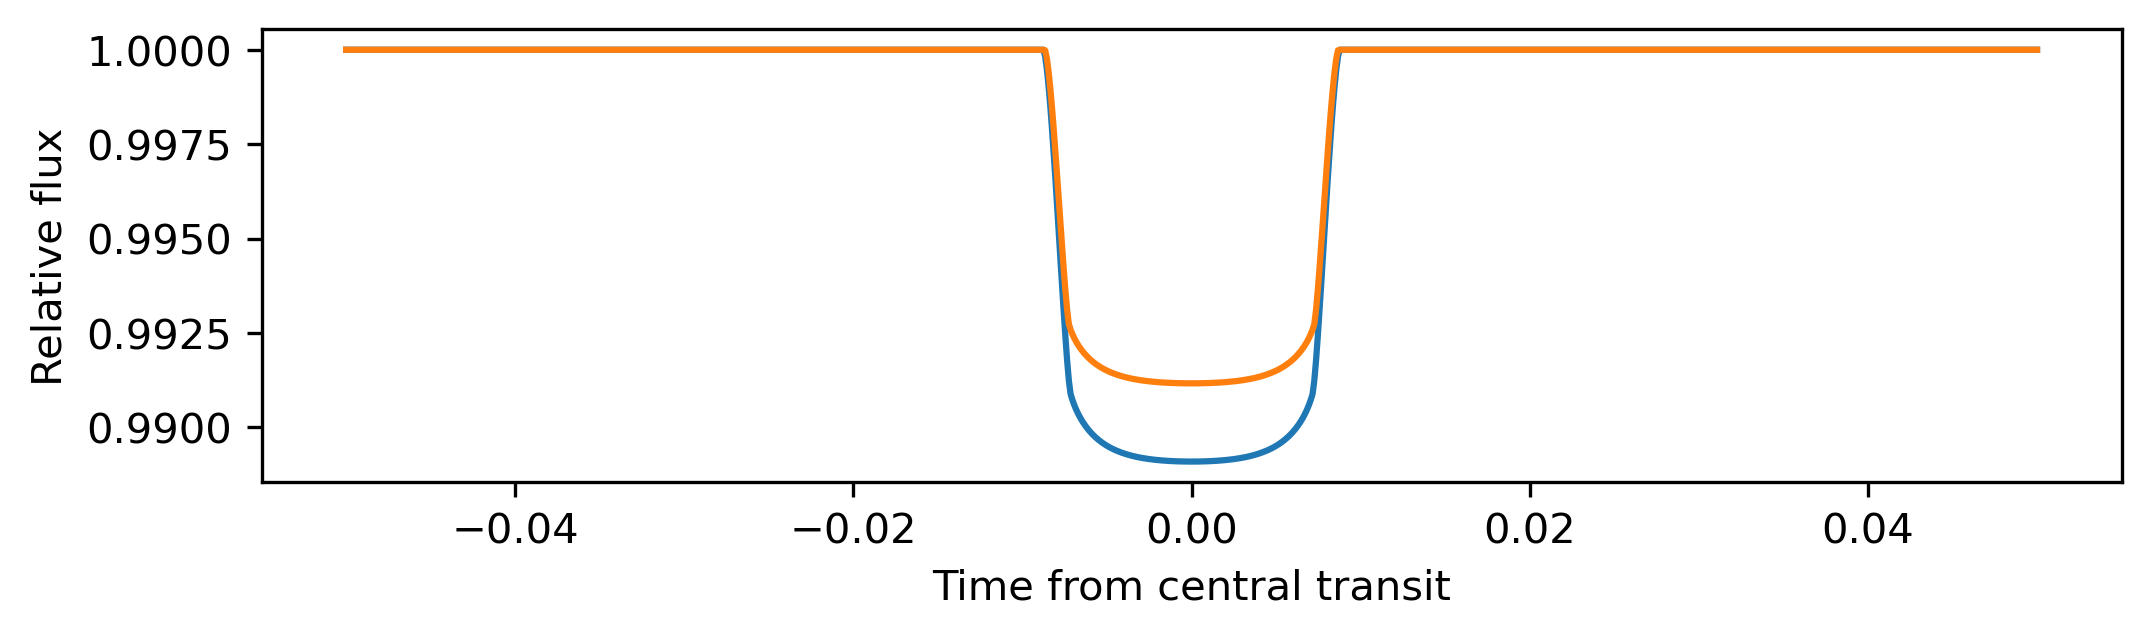

In [6]:
plot_lightcurve(rp=0.1, a=20, inc=90.0)
plot_lightcurve(rp=0.09, a=20, inc=90.0)

If all we care about is using the `plot_lightcurve` function and changing a few parameters, we can just paste that exact code into a text file called `visualization.py` in the same directory as this notebook, and then import it here.

In [7]:
import visualization as vi

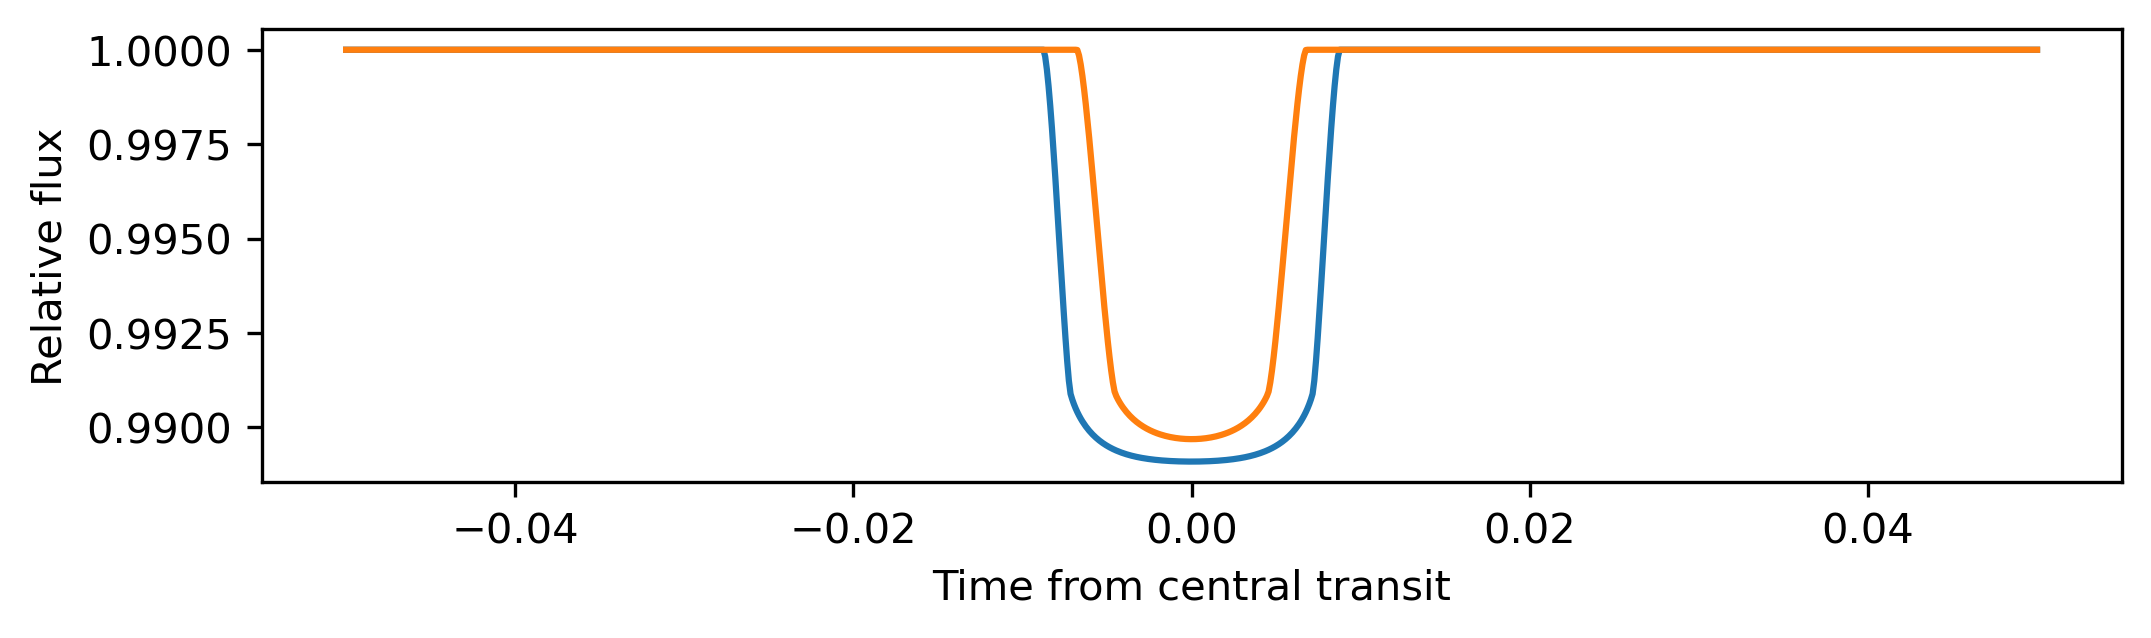

In [8]:
vi.plot_lightcurve(rp=0.1, a=20, inc=90.0)
vi.plot_lightcurve(rp=0.1, a=20, inc=88.0)

## Downloading simulated data.

For this Pre-Launch Data Hackathon, teams put together simulated datasets for each of the four JWST instruments: NIRISS, NIRCam, NIRSpec, MIRI. Each simulation has a transit and/or eclipse signal of the exoplanet injected into, all trying to represent the hot Jupiter exoplanet WASP-43b. Because those simulated each contain thousands of integrations, the files are **very** big. 

The complete simulations, along with notes about how they were created and what their limitations are, are available in a Box folder [here](https://stsci.app.box.com/s/8r6kqh9m53jkwkff0scmed6zx42g307e/folder/135008457626). If you are interested in a particular instrument, these simulations may be a great place to start exploring what its data will look like!

For convenience, Thomas Beatty made us a mini NIRCam dataset that contains only 10 exposures. It is a calibrated pixel-level dataset that included in this tutorial directory as the file `MiniDataset_calints.fits.gz`.  If you're using this notebook, you've probably already downloaded it!

## Testing on a single pixel.

Analyzing JWST data is a big task! We'll start small, by looking at how much the brightness recorded by an individual detector pixel changes over time. First we'll open the file and seeing what it's contents are.

In [9]:
from astropy.io import fits

# open the mini simulated dataset
hdu = fits.open('MiniDataset_calints.fits.gz')

# print out some information about its contents
hdu.info()

Filename: MiniDataset_calints.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     266   ()      
  1  SCI           1 ImageHDU        69   (2048, 64, 11)   float32   
  2  ERR           1 ImageHDU        11   (2048, 64, 7)   float32   
  3  DQ            1 ImageHDU        12   (2048, 64, 7)   int32 (rescales to uint32)   
  4  WAVELENGTH    1 ImageHDU         9   (2048, 64)   float32   
  5  AREA          1 ImageHDU        10   (2048, 64, 7)   float32   
  6  VAR_POISSON    1 ImageHDU        10   (2048, 64, 7)   float32   
  7  VAR_RNOISE    1 ImageHDU        10   (2048, 64, 7)   float32   
  8  VAR_FLAT      1 ImageHDU        10   (2048, 64, 7)   float32   
  9  INT_TIMES     1 BinTableHDU     13   11R x 2C   [J, D]   
 10  ASDF          1 BinTableHDU     11   1R x 1C   [26363B]   


Next, we'll write a function to plot the light curve of a single pixel. It will take the row and column of the pixel we want to plot as input arguments.

In [10]:
def plot_single_pixel(row=33, col=1750):
    '''
    Circle a pixel on the simulated JWST NIRCam dataset,
    and plot the light curve of that pixel.
    
    Parameters:
    -----------
    row : int
        The row of the pixel to plot (starting at 0).
    col : int
        The column of the pixel to plot (starting at 0).    
    '''

    # define a 3D array of flux (times x rows x columns)
    flux = hdu['SCI'].data

    # keep track of the flux units
    unit = hdu['SCI'].header['BUNIT']

    # calculate a median image from all the integrations
    median_image = np.median(flux, 0)
    
    # pull out the pixel light curve for this row, column
    pixel_lightcurve = flux[:, row, col]
    time = hdu['INT_TIMES'].data['int_mid_BJD_TDB']
    
    # create a figure with two spaces to plot into
    fi, ax = plt.subplots(2, 1, figsize=(8, 5), dpi=300)
    
    # plot the median image, with the pixel location circled
    plt.sca(ax[0])
    bottom, top = np.percentile(median_image, [1, 99.5])
    plt.imshow(median_image, aspect='auto', vmin=bottom, vmax=top, cmap='magma')
    plt.colorbar(label=f'Pixel Brightness [{unit}]')
    plt.scatter(col, row, edgecolor='white', facecolor='none')
    plt.text(col, row, f'\n({col}, {row})', color='white', va='top', ha='center')
    plt.xlabel('Column (pixels)')
    plt.ylabel('Row (pixels)')
    
    # plot the light curve of that particular pixel
    plt.sca(ax[1])
    plt.plot(time, pixel_lightcurve, marker='o', color='black')
    plt.xlabel('Time (BJD - 2400000.5)')
    ax[1].ticklabel_format(useOffset=False)
    plt.ylabel(f'Pixel ({col}, {row}) Flux\n[in units of {unit}]')
    plt.tight_layout() 

Now, let's plot some random background pixel. It has some noise in it due to the detector noise, the brightness of the sky, and the thermal emission of the telescope itself.

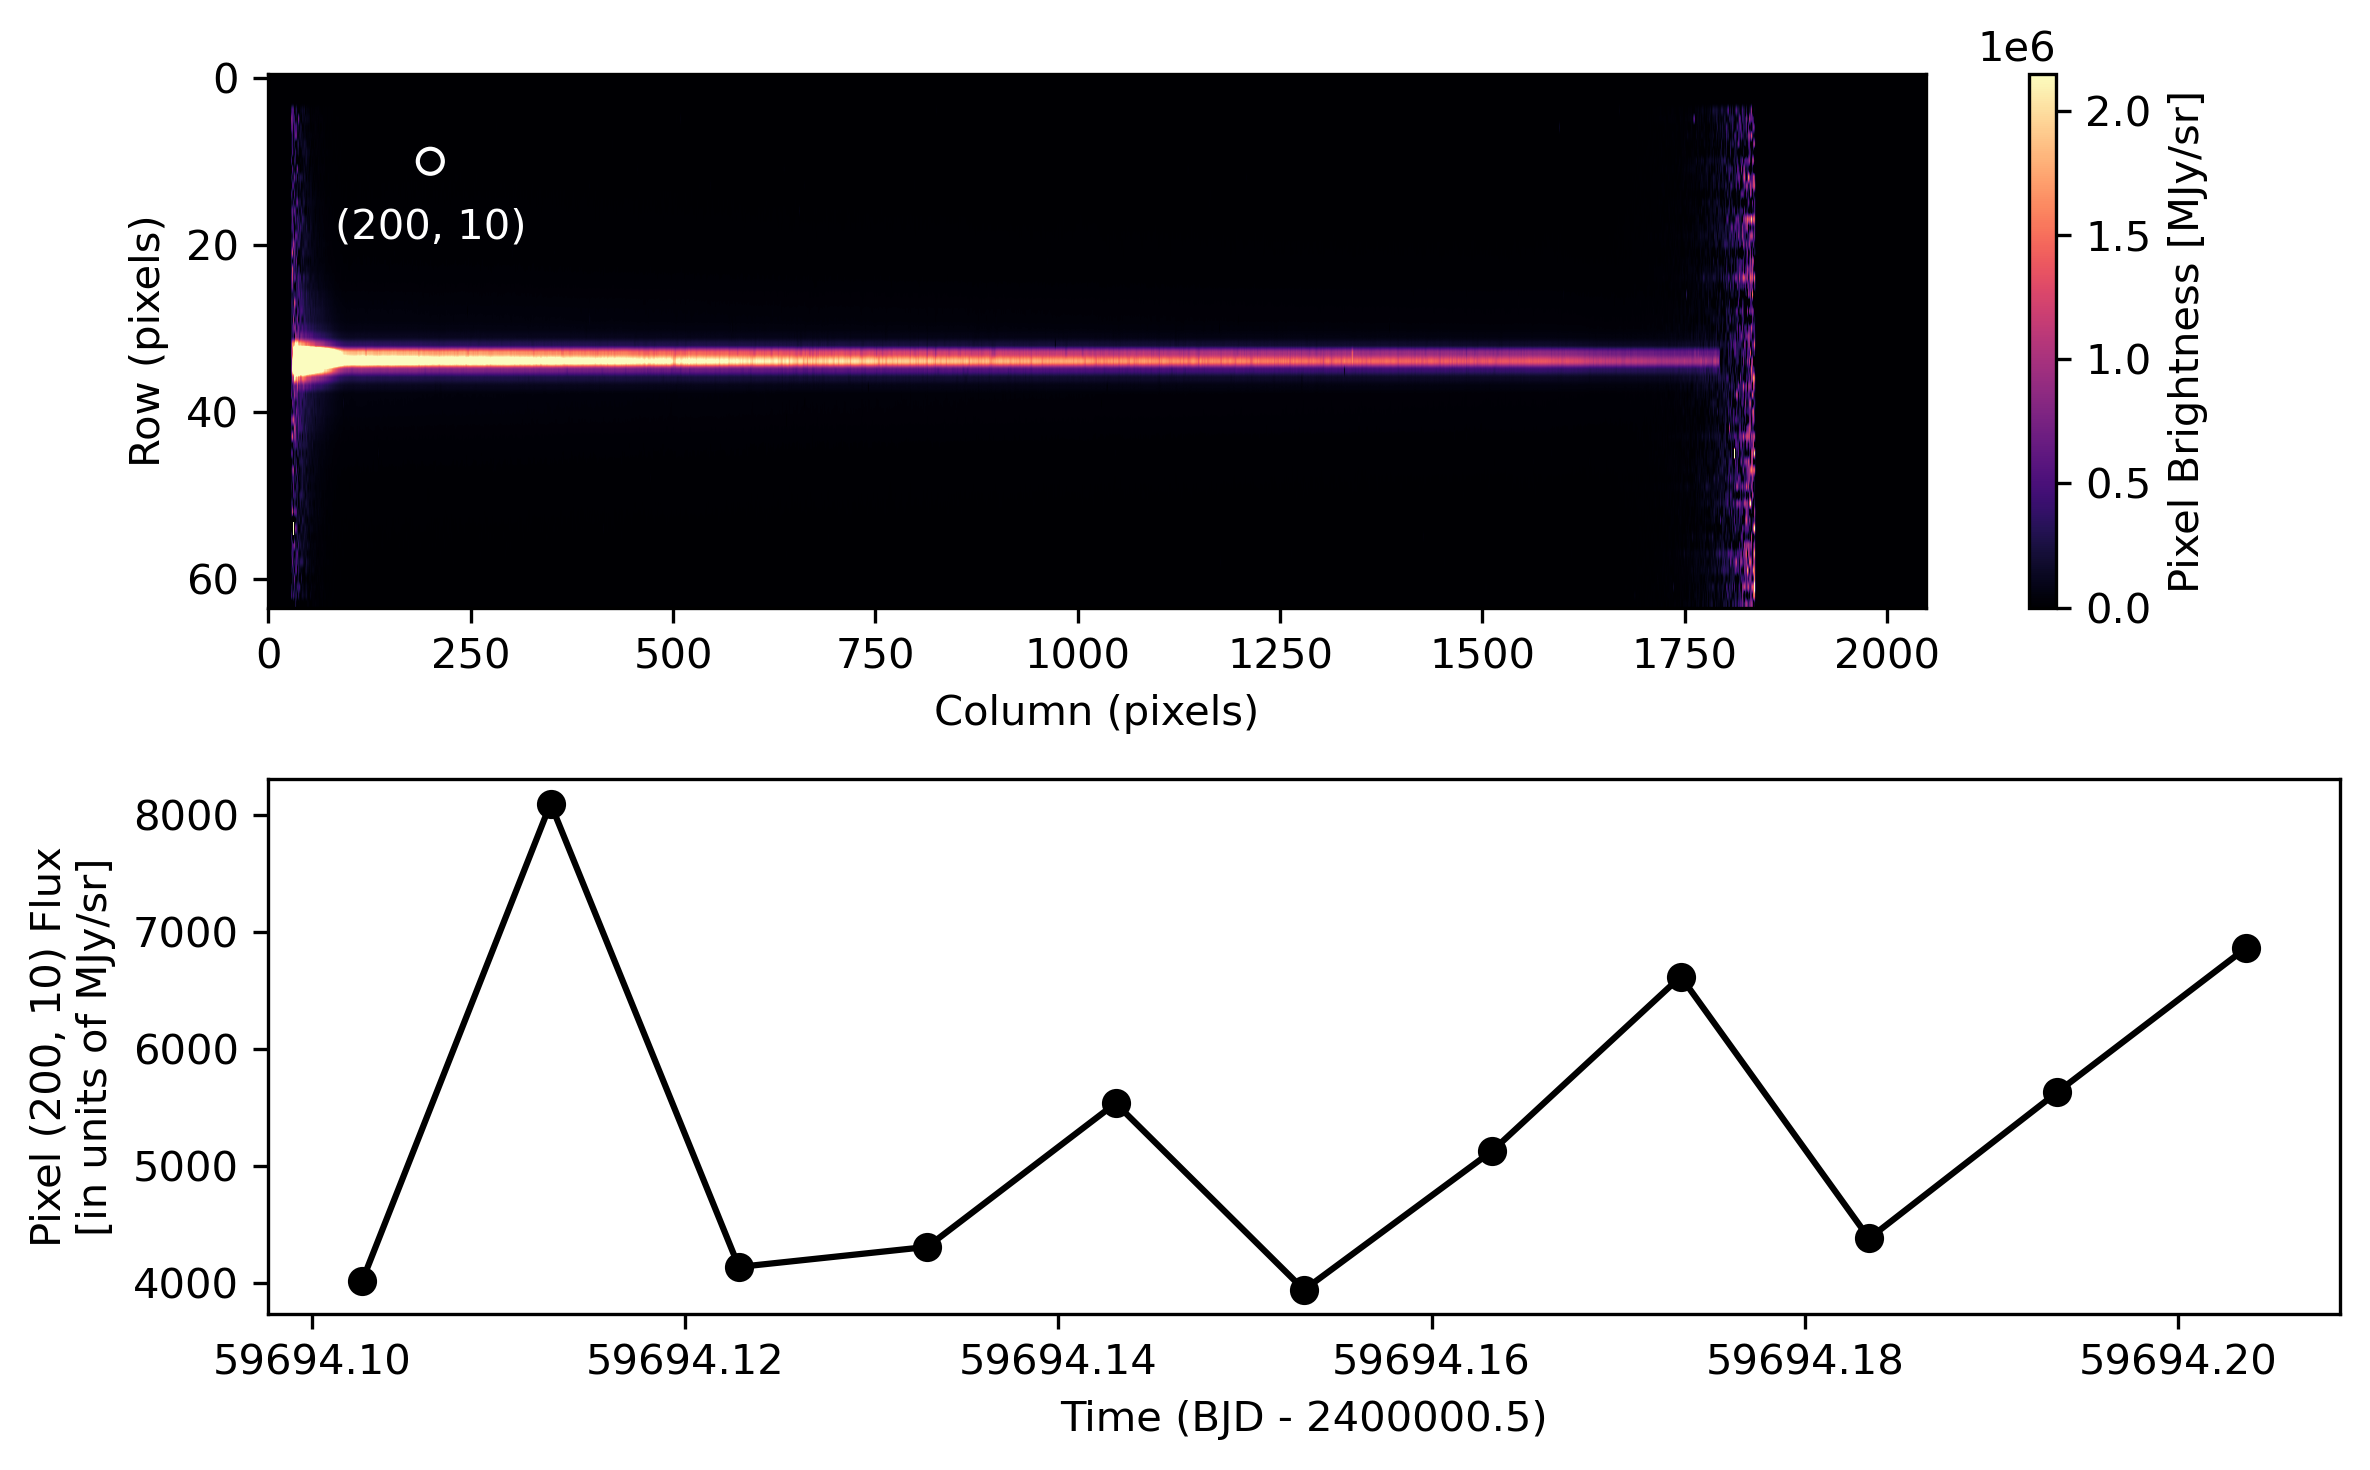

In [11]:
plot_single_pixel(row=10, col=200)

## Homework

Here are two activities you can try to complete on your own.

1. **Plot a different pixel.** Use the provided function to plot the light curve for a different pixel from this simulated NIRCam dataset. If you are curious to see the light curve of a pixel somewhere along the actual spectrum of the star (aren't you???), try to pick a row and column that falls somewhere along the horizontal stripe in the middle of the image. *(This may seem like a basic assignment, but our sneaky our goal is just to make sure your environment is set up to be able to run Python, load a file, and make a plot.)*
2. **Plot a summed light curve.** Plot a light curve that adds together the flux from lots of rows and columns of pixels. In these simulated NIRCam data, you may want to exclude columns below 50 or above 1750, as those are very noisy. *(This is a smidge more complicated. Good luck!)*